# Pricing Asian and Lookback options using Monte Carlo Simulations

### Types of Options

- #### **American and Vanilla Options**

When we talk about Options in the stock market, we usually refer to either American or European options, which that the two most prevalent options traded in the market. <br> The European being called a vanilla option as it has to be exercised at the time of maturity only and it is priced by taking the expected value of the discounted payoff : <br>

$V(S,t) = e^{-rT} *  \mathbf{E}(Max(S_t - E, 0))$
<br><br>

Here we see that the Vanilla option price is determined by discounting the expected value of the payoff at maturity. <br> 

In a risk neutral setting, it is discounted by the **risk free rate** ($r$ ; discount factor = $e^{-rT}$) and the expected payoff is the greater of zero and the different between the price of the underlying at maturity and the strike price ($Max(S_t - E,0)$).

<hr>

- #### **Exotic Options**

Exotic options are called so because they behave differently from your normal vanilla option. These exotic options are **not traded in an open market** but are usually traded **over the counter (OTC)** as these contracts are designed specially by the buyer and the seller with certain features that make it complex to price and hedge. <br>

There are a number of different exotic options but here we will talk about **Asian** and **Lookback Options**. <br><br>

**1. Asian Options**

An Asian option, also known as *Average Options*, has its payoff dependant on the **average price** of the underlying stock over a certain period of time unlike American and European Options. It is typically the **geometric** or **arithmetic average** of the underlying at discrete intervals.<br>

Due to the option being dependant on an average, it has a relatively **low volatility** which in turn makes these options cheaper (approximately half the value of Vanilla Options).<br>
It is **Strongly Path Dependant** as its value before expiry depends on the path it takes.<br><br>

Calculating the Average Price of the Underlying :<br>

$A = \frac{1}{n} \Sigma^{n}_{i=1} S(t_i)$
<br><br>

Calculating Expected Payoff :<br><br>

1. **Using Fixed Strike** <br>

$Call = \mathbf{E}(Max(A - E,0))$
<br>

$Put = \mathbf{E}(Max(E - A,0))$
<br><br>

2. **Using Floating Strike** <br>

$Call = \mathbf{E}(Max(S_t - A,0))$
<br>

$Put = \mathbf{E}(Max(A - S_t,0))$
<br><br>

Then, in a **risk neutral** setting, it is priced by discounting the expected payoff using the **risk free rate**
<br>



2. **Lookback Options**

Lookback options allows the holder to have the advantage of knowing the **price history** of the underlying when determining when to exercise their option. It allows the user to "look back," or review, the prices of an underlying asset over the lifespan of the option after it has been purchased. The holder may then exercise the option **based on the most beneficial price** of the underlying asset. <br>

Because lookback options provide the holder such a huge advantage to exercise their respective option at the highest price, these options are usually very expensive, sometime almost double the price of Vanilla options.<br><br>

Since these options depend on their price history, they are **Strongly Path Dependant Options**, which also tells us that while calculating the payoff, we have to consider an additional factor.
<br><br>

Calculating Min and Max :<br>

$m = min_{1\le i \le n} S(t_i)$
<br>

$M = max_{1\le i \le n} S(t_i)$
<br><br>

Calculating Expected Payoff :<br>

1. **Using Fixed Strike**

$Call = \mathbf{E}(Max(M - E,0))$
<br>

$Put = \mathbf{E}(Max(E - m,0))$
<br><br>

2. **Using Floating Strike**

$Call = \mathbf{E}(Max(S_T - M,0))$
<br>

$Put = \mathbf{E}(Max(m - S_T,0))$
<br><br>

In a **risk neutral** market, we valuate the option price by discounting the expected payoff by the **risk free rate**.

<hr>

## Task At Hand :

The basic outline of our given financial problem is as follows :<br>

Using the expected value of the discounted payoff under the risk neutral density $\mathbf{Q}$, we need to valuate **Asian** and **Lookback Options**.<br>

$V(S,t) = e^{-r(T-t)} \mathbf{E}^{\mathbf{Q}}[Payoff(S_T)]$
<br>

We also need to use the **Euler Maruyama Scheme** to simulate the underlying stock prices using **Monte Carlo Simulations**
<br><br>

**Sample Data Given :**<br>

Today's Stock price $S0 = 100$<br>
Strike $E = 100$<br>
Time to Expiry $(T-t) = 1 year$<br>
Volatility $\sigma = 20\%$<br>
Constant Risk Free Interest Rate $r = 5\%$ 

## Procedure :

Let us start by importing all the necessary python libraries that we will require to perform the task at hand.<br>

We use the **pandas** and **numpy** libraries to help with mathematical and statistical calculations.<br>
The **matplotlib** and **opstrat** libraries are great tools to help with plotting of graphs. 

In [234]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import opstrat as op

Moving on.<br>

We will now go ahead and define a class called MonteCarloOptionPricing. This class will host all the necessary functions needed to perform our task.<br>
We make use of classes as it makes the code more compact and increases the execution time by decreasing lines of code.
<br>

All the functions that we define in this class from now on will act as properties of this class (we add the **@property** tag before defining each function).
<br><br>

##### **Functions**

- **def __ init __** <br>
This function is an initialization function. It takes the arguments that need to be used and initializes them to be the respective value.
<br>

- **def normrng** <br>
This is the first property we define. It uses **np.random** to generate an array of N random numbers which will be later used in the Euler-Maruyama scheme as a variable of Brownian motion.
<br>

- **def simulatepath** <br>
This function is used to simulate N number of price paths for ts number of time steps using Monte Carlo simulations, and the prices for each time step is calculated using the Euler Maruyama Scheme.<br>

    The **Euler-Maruyama Method** is a method to approximate a numerical solution to a stochastic differential equation. Thus while calculating the stock prices, we get an output in the float datatype. <br>

    $S[t+1] = S[t] * (1 + rf * dt + \sigma * \sqrt{dt} * W)$
    <br><br>
    Where :<br>
    $rf$ is the risk free interest rate<br>
    $dt$ is the time of expiry divided by the time steps <br>
    $\sigma$ is the volatility <br>
    $W$ is the variable of Brownian Motion which is the random variable produced by **def normrng** in this function.
<br>

- **def vanillaoption** <br>
This function calculates the value of a European call and put option for the given simulated prices at the given parameters.
<br>

- **def asianoption** <br>
This function calculates the value of an Asian call and put option by taking the **average price over the given time period** and using it to calculate the valuation. Both Fixed and Floating strike is used.
<br>

- **def lookbackoption** <br>
This function calculates the value of a Lookback call and put option by finding the **Minimum and Maximum price** the underlying stock reached and using it to valuate the option. Both Fixed and Floating strike is used.

In [235]:
class MonteCarloOptionPricing:

    # Initializing the arguments of the function
    def __init__(self, S0:float, strike:float, rate:float, sigma:float, dte:int, nsim:int, timesteps:int=252) -> float:
        self.S0 = S0 # Initial stock price
        self.E = strike # Strike price
        self.r = rate # Risk-free interest rate
        self.sigma = sigma # Volatility
        self.T = dte # Time to expiry
        self.N = nsim # Number of simulations
        self.ts = timesteps # Time steps
    
    # Sub function to generate N number of standard normal random numbers
    @property
    def normrng(self):
        return np.random.standard_normal(self.N)
    
    # Simulating N number of random walks showing the random path of the stock price in each
    @property
    def simulatepath(self):
        np.random.seed(2024)

        # Define dt
        dt = self.T/self.ts

        # Initialize an array S with ts rows and N columns
        S = np.zeros((self.ts, self.N))
        S[0] = self.S0

        for i in range(0, self.ts-1):

            # Variable of Brownian Motion
            w = self.normrng

            # Using Euler-Maruyama Scheme to calculate the underlying stock price at each time step ts for each simulation N
            S[i+1] = S[i] * (1+ self.r*dt + self.sigma * np.sqrt(dt)*w)

        return S
    
    # Calculating the price of Vanilla options from all the simulated paths
    @property
    def vanillaoption(self):
        S = self.simulatepath

        # calculate the discounted value of the expeced payoff
        vanilla_call = np.exp(-self.r*self.T) * np.mean(np.maximum(0, S[-1]-self.E))
        vanilla_put = np.exp(-self.r*self.T) * np.mean(np.maximum(0, self.E-S[-1]))
        
        return [vanilla_call, vanilla_put]

    # Calculating the price of Asian options from all the simulated paths
    @property
    def asianoption(self):
        S = self.simulatepath

        # Average the price across days
        A = S.mean(axis=0)

        # Calculate the discounted value of the expeced payoff
        # Using fixed strike
        asian_fixed_call = np.exp(-self.r*self.T) * np.mean(np.maximum(0, A-self.E))
        asian_fixed_put = np.exp(-self.r*self.T) * np.mean(np.maximum(0, self.E-A))

        # Using floating strike
        asian_floating_call = np.exp(-self.r*self.T) * np.mean(np.maximum(0, S[-1]-A))
        asian_floating_put = np.exp(-self.r*self.T) * np.mean(np.maximum(0, A-S[-1]))
        
        return [asian_fixed_call, asian_fixed_put , asian_floating_call, asian_floating_put]
    
    # Calculating the price of Lookback options from the simulated paths
    @property
    def lookbackoption(self):
        S = self.simulatepath

        # Finding the Maximum price of the underlying throughout the life of the option
        M = S.max(axis=0)

        # Finding the minimum price of the underlying throughout the life of the option
        m = S.min(axis=0)

        # Calculating discounted value of expected payoff
        # Using fixed strike
        lookback_fixed_call = np.exp(-self.r*self.T) * np.mean(np.maximum(M-self.E,0))
        lookback_fixed_put = np.exp(-self.r*self.T) * np.mean(np.maximum(self.E-m,0))
        
        # Using floating strike
        lookback_floating_call = np.exp(-self.r*self.T) * np.mean(np.maximum(S[-1]-m,0))
        lookback_floating_put = np.exp(-self.r*self.T) * np.mean(np.maximum(M-S[-1],0))

        return [lookback_fixed_call,lookback_fixed_put,lookback_floating_call,lookback_floating_put]

##### Now let us run the functions and generate all the results.

In [236]:
# Instantiate
mc = MonteCarloOptionPricing(100,100,0.05,0.2,1,10000)
# Verify the generated price paths
pd.DataFrame(mc.simulatepath).head(2)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,102.121383,100.948812,99.765928,99.82971,101.173958,101.481719,96.718999,98.350127,100.599372,100.148414,...,100.915072,101.70274,98.436065,99.824714,98.023681,99.864678,99.954724,99.056467,100.080122,101.468502


## Verifying the Random numbers and Price paths

### Histogram of Psuedo Random Numbers

We see that all the randomly generated numbers generated by **normrng** are normally distributed forming a bell shaped curve peaking at 0.

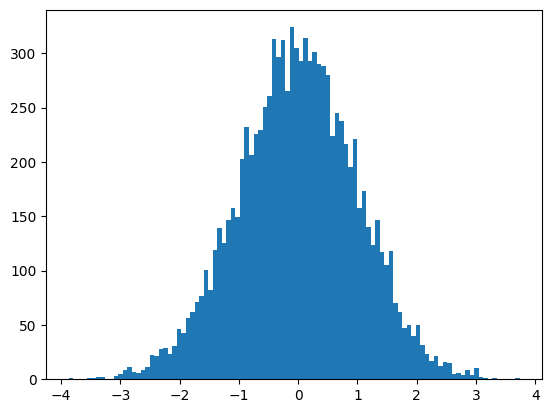

In [237]:
# Plot the histogram
plt.hist(mc.normrng, bins=100);

### Histogram of Simulated Paths

Here we can see that the simulated prices are all situated somewhere near the 100 mark and so the histogram is left skewed, which is as it should be since our base price of the underlying is 100.

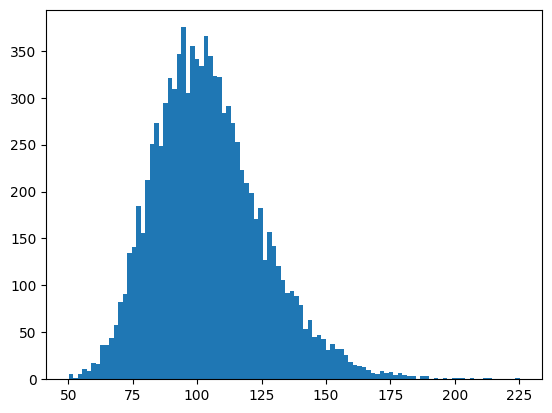

In [238]:
# Plot the histogram of the simulated price path at maturity
plt.hist(mc.simulatepath[-1], bins=100);

So we know that we are on the right path.

# Visualization of Simulated Paths

Now lets visualize the first 100 price paths that we generated using Monte Carlo simulations and Euler Maruyama Scheme.

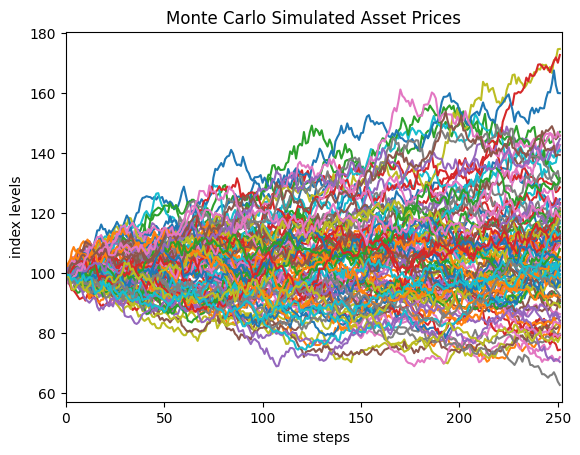

In [239]:
# Plot initial 100 simulated path using matplotlib
plt.plot(mc.simulatepath[:,:100])
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.title('Monte Carlo Simulated Asset Prices');

We can see that they all start at a point, **100**, and move randomly, giving the highest price at **approximately 175** and the lowest at **approximately 65** at **time step 252**.

<hr>

# Case 1

$S0 = 100$<br>
$E = 100$<br>
$(T-t) = 1 year$<br>
$\sigma = 20\%$<br>
$r = 5\%$

### Pricing The Options for Case 1

In [240]:
# Get option values
print("Using Fixed Strike :")
print(f"Asian Call Option Value is {mc.asianoption[0]:0.4f}")
print(f"Asian Put Option Value is {mc.asianoption[1]:0.4f}\n")
print("Using Floating Strike :")
print(f"Asian Call Option Value is {mc.asianoption[2]:0.4f}")
print(f"Asian Put Option Value is {mc.asianoption[3]:0.4f}")

Using Fixed Strike :
Asian Call Option Value is 5.6837
Asian Put Option Value is 3.3811

Using Floating Strike :
Asian Call Option Value is 5.6441
Asian Put Option Value is 3.5050


In [241]:
print("Using Fixed Strike :")
print(f"Lookback Call Option Value is {mc.lookbackoption[0]:0.4f}")
print(f"Lookback Put Option Value is {mc.lookbackoption[1]:0.4f}\n")
print("Using Floating Strike :")
print(f"Lookback Call Option Value is {mc.lookbackoption[2]:0.4f}")
print(f"Lookback Put Option Value is {mc.lookbackoption[3]:0.4f}\n")

Using Fixed Strike :
Lookback Call Option Value is 18.1355
Lookback Put Option Value is 11.8031

Using Floating Strike :
Lookback Call Option Value is 16.2448
Lookback Put Option Value is 13.6939



In [242]:
print(f"European Call Option Value is {mc.vanillaoption[0]:0.4f}")
print(f"European Put Option Value is {mc.vanillaoption[1]:0.4f}")

European Call Option Value is 10.1560
European Put Option Value is 5.7143


#### **Inference**

- We have chosen to calculate the price of European options as well because the Vanilla option **serves as a guide** to confirm if we have gotten the correct results for the other two options that we are asked to find.<br><br>

- Now we see that for our sample parameters, we have gotten **European call option** to be **10.16**.<br>
Moreover, the **Asian call option** is priced at **5.68** using **Fixed Strike** and **5.64** using **Floating strike**, since they both are **approximately half the price** of the European option, we can surely say that our calculation is correct.<br>

- The Asian put option **follows the same principal** as well, with respect to the European put option.<br><br>

- Moving to Lookback options, we need to deal with Fixed strike and Floating strike a little differently.<br>
    - While calculating Lookback options using **fixed strike**, the strike price is set or **fixed at the time of purchase** of said option, like most other option conrtracts.<br> But, at the time of exercise, the **most beneficial price** of the underlying asset over the life of the contract is used instead of the current market price.<br>

        Thus we have prices our **Fixed strike Lookback call option** at **18.14**, which is just **more than** the price of the European option. It is only so because as we discussed earlier, it gives the holder of the option the **advantage** to choose the **most beneficial price** of the underlying stock at the time of exercise.
    <br><br>
    - Looking at **Floating strike Lookback options**, the strike price is **set automatically at maturity** to the **most favorable underlying price** reached during the contract's life. **Call options** fix the strike at the **lowest underlying asset price**, while **put options** fix the strike at the **highest price point**.<br> The option will then settle against the **market price** calculating the profit or loss against the floating strike. This valuates it a little lower than the Fixed strike Lookback option.<br>

        So, we valuate our **Floating strike Lookback call option** at **16.24** which is lower by 2 from the fixed strike. Since we can confirm that, we know that this was calculated perfectly as well.

## Plotting Asian Payoff

Here we use the opstrat library to plot the payoff graphs for **Asian Call** and ****Asian Put** options.<br><br>
We have only considered **Fixed Strike** for the plots.

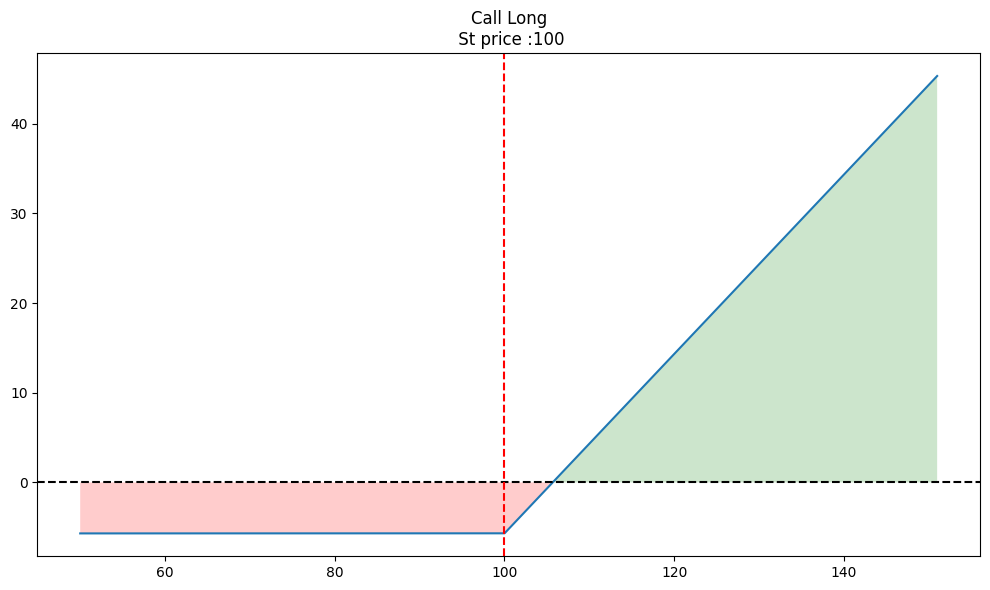

In [243]:
op.single_plotter(
    op_type = 'c',
    spot = mc.S0,
    spot_range = 50,
    strike = mc.E,
    tr_type='b',
    op_pr = mc.asianoption[0]
)

In the above graph, we see that up until the strike price of 100 is reached, the line is parallel to the X-axis. This shows that there is 0 payoff.<br>
Once it reached 100, it starts rising as, the higher the underlying stock price, the higher the payoff from the option at exercise time.<br><br>
We must also note than, from 100 to the point where the payoff line intersects the X-axis, there is still no profit as that is the premium paid by the option holder during the time of purchase of the option.

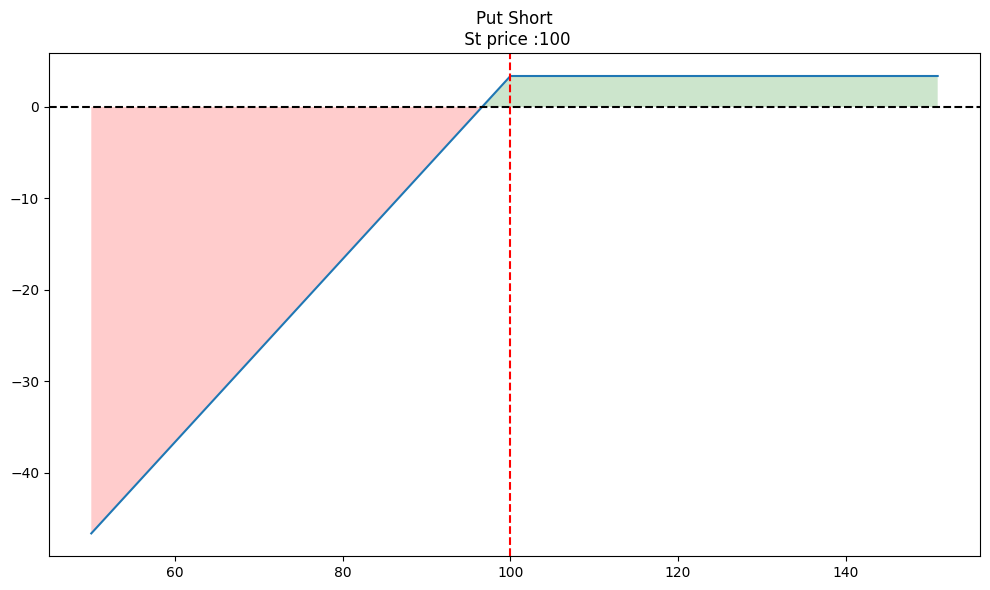

In [244]:
op.single_plotter(
    op_type = 'p',
    spot = mc.S0,
    spot_range = 50,
    strike = mc.E,
    tr_type='s',
    op_pr = mc.asianoption[1]
)

Since this is a put option graph, it is the opposite of the call option. When the price falls is when the payoff and in turn the profit rises. Whereas when the price rises above strike price, the payoff is 0 and the loss is the premium paid at the time of purchase.

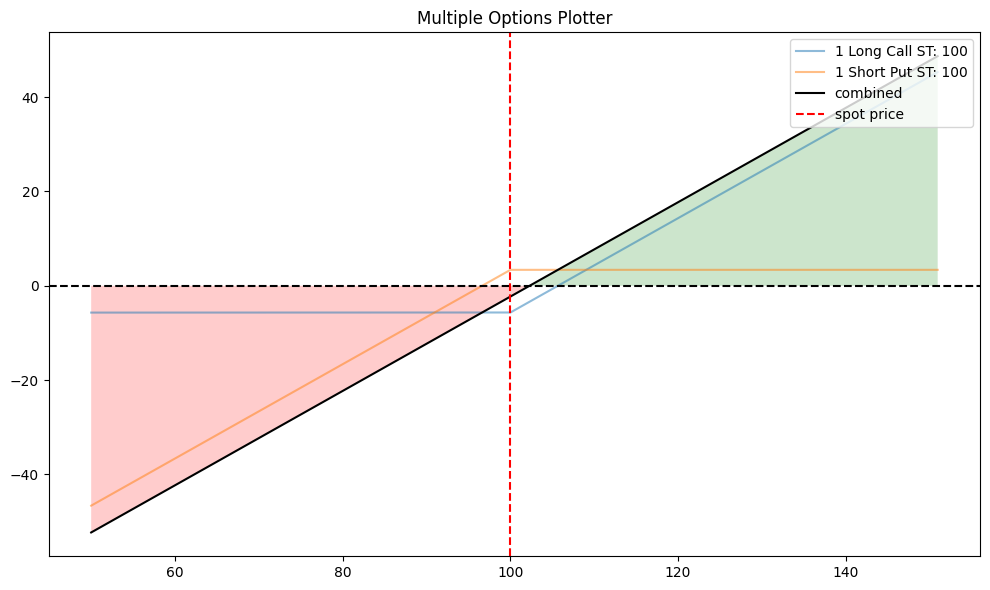

In [245]:
asian_fixed_call = {
    'strike': 100,
    'tr_type': 'b',
    'op_pr': mc.asianoption[0],
    'op_type': 'c'
}

asian_fixed_put = {
    'strike': 100,
    'tr_type': 's',
    'op_pr': mc.asianoption[1],
    'op_type': 'p'
}

op_list=[asian_fixed_call,asian_fixed_put]

op.multi_plotter(
    spot = mc.S0,
    spot_range=50,
    op_list= op_list
)

This graph shows both call and put options together in one single graph.

## Plot lookback Payoff

### **Fixed Strike**

The graph of a Lookback option is going to give us the same inference as that of the Asian option, the difference being the values at which the payoff is positive.<br>

Below is the Fixed Strike Lookback Call Option.

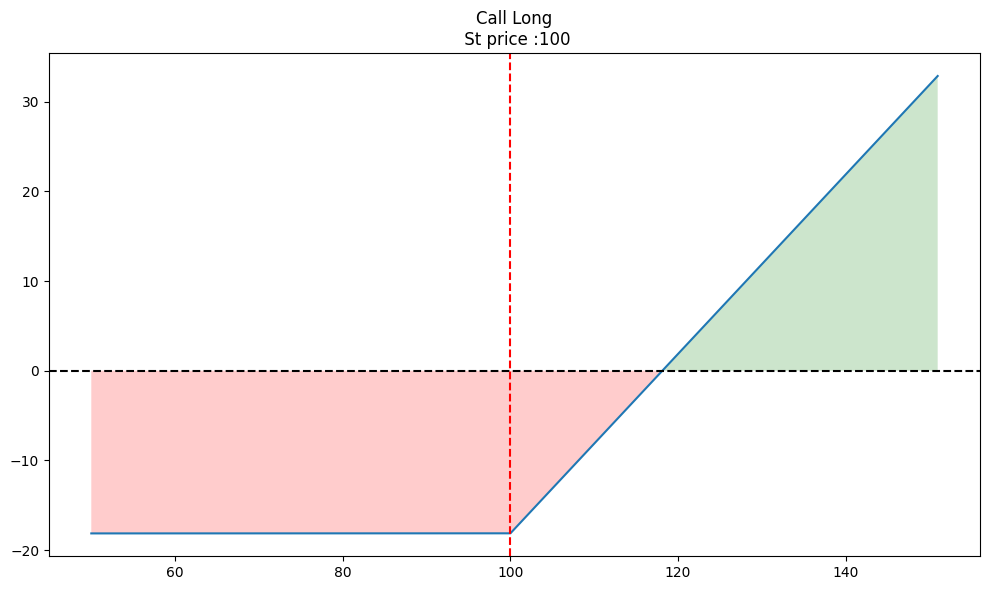

In [246]:
op.single_plotter(
    op_type = 'c',
    spot = mc.S0,
    spot_range = 50,
    strike = mc.E,
    tr_type='b',
    op_pr = mc.lookbackoption[0]
)

Next is the Fixed Strike Lookback Put Option.

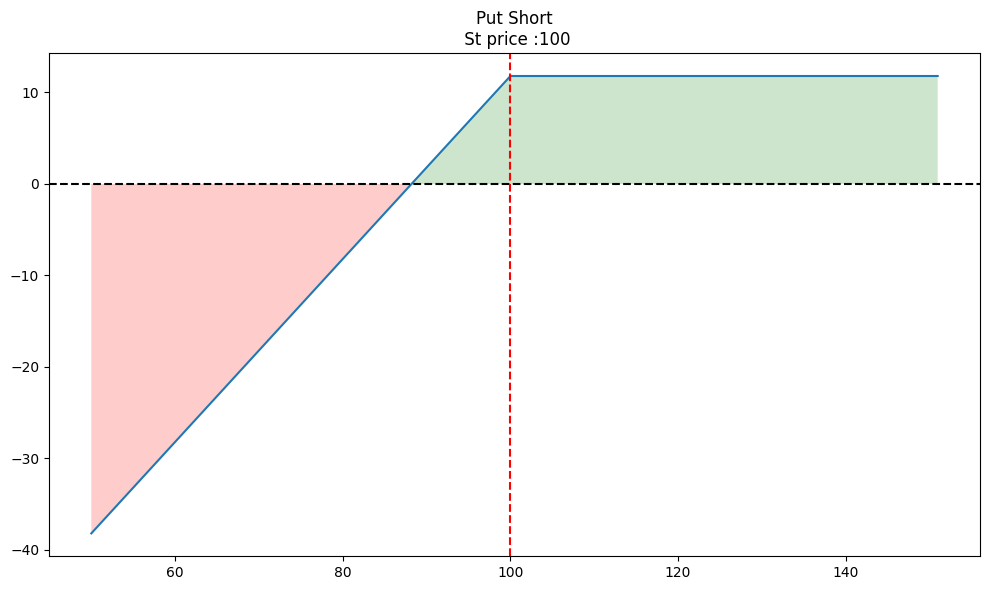

In [247]:
op.single_plotter(
    op_type = 'p',
    spot = mc.S0,
    spot_range = 50,
    strike = mc.E,
    tr_type='s',
    op_pr = mc.lookbackoption[1]
)

### **Floating Strike**

Here we have the Floating Strike Lookback Call Option payoff graph.

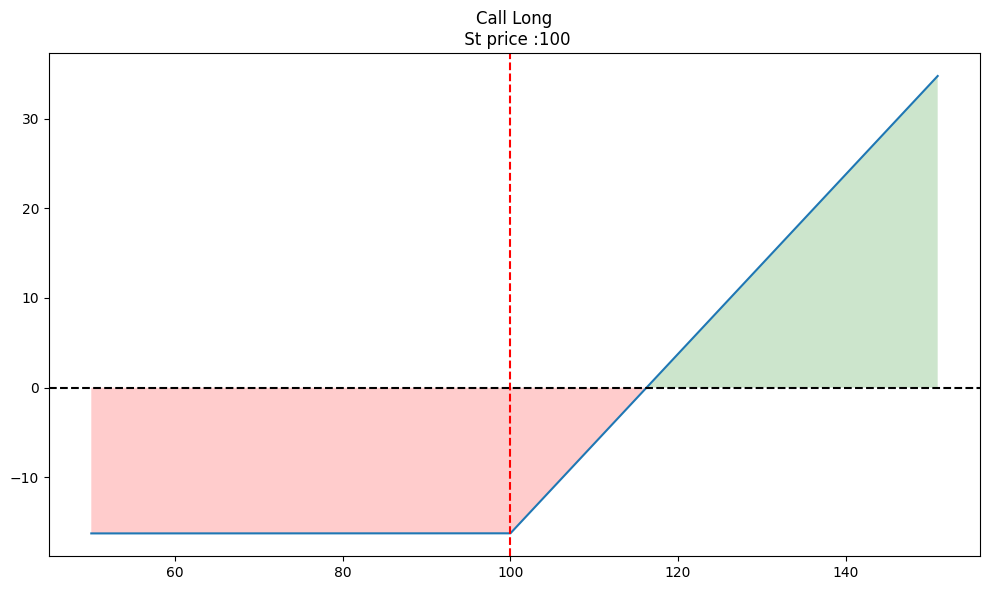

In [248]:
op.single_plotter(
    op_type = 'c',
    spot = mc.S0,
    spot_range = 50,
    strike = mc.E,
    tr_type='b',
    op_pr = mc.lookbackoption[2]
)

And finally the Floating Strike Lookback Put Option payoff graph.

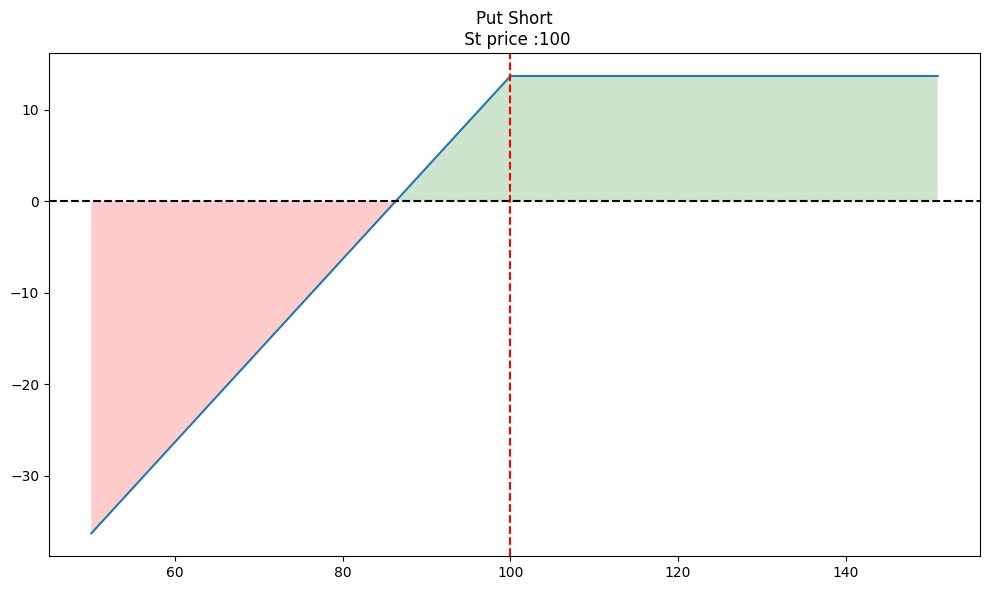

In [249]:
op.single_plotter(
    op_type = 'p',
    spot = mc.S0,
    spot_range = 50,
    strike = mc.E,
    tr_type='s',
    op_pr = mc.lookbackoption[3]
)

#### **Case 1**

|       **Option**       | **Case 1** | **Case 2** | **Case 3** | **Case 4** | **Case 5** |     
|------------------------|------------|------------|------------|------------|------------|
| Vanilla Call           | 10.1560    |  -         |  -         |  -         |  -         |
| Vanilla Put            | 5.7143     |  -         |  -         |  -         |  -         |
| Asian Fixed Call       | 5.6837     |  -         |  -         |  -         |  -         |
| Asian Fixed Put        | 3.3811     |  -         |  -         |  -         |  -         |
| Asian Floating Call    | 5.6441     |  -         |  -         |  -         |  -         |
| Asian Floating Put     | 3.5050     |  -         |  -         |  -         |  -         |
| Lookback Fixed Call    | 18.1355    |  -         |  -         |  -         |  -         |
| Lookback Fixed Put     | 11.8031    |  -         |  -         |  -         |  -         |
| Lookback Floating Call | 16.2448    |  -         |  -         |  -         |  -         |
| Lookback Floating Put  | 13.6939    |  -         |  -         |  -         |  -         |


<hr>

# Case 2

For Case 2, let us increase the Strike price of the option and observe the changes that occur.<br><br>

$S0 = 100$<br>
$E = 150$<br>
$(T-t) = 1 year$<br>
$\sigma = 20\%$<br>
$r = 5\%$

In [250]:
# Instantiating and simulating all paths
mc = MonteCarloOptionPricing(100,150,0.05,0.2,1,10000)
pd.DataFrame(mc.simulatepath).head(2)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,102.121383,100.948812,99.765928,99.82971,101.173958,101.481719,96.718999,98.350127,100.599372,100.148414,...,100.915072,101.70274,98.436065,99.824714,98.023681,99.864678,99.954724,99.056467,100.080122,101.468502


Since we already tested the normality of the random numbers and the skewness of the stock prices, we will not plot those graphs again.<br>

Let's move on to pricing the options.

### Pricing the Options for Case 2

In [251]:
# Get option values
print("Using Fixed Strike :")
print(f"Asian Call Option Value is {mc.asianoption[0]:0.4f}")
print(f"Asian Put Option Value is {mc.asianoption[1]:0.4f}\n")
print("Using Floating Strike :")
print(f"Asian Call Option Value is {mc.asianoption[2]:0.4f}")
print(f"Asian Put Option Value is {mc.asianoption[3]:0.4f}")

Using Fixed Strike :
Asian Call Option Value is 0.0028
Asian Put Option Value is 45.2617

Using Floating Strike :
Asian Call Option Value is 5.6441
Asian Put Option Value is 3.5050


In [252]:
print("Using Fixed Strike :")
print(f"Lookback Call Option Value is {mc.lookbackoption[0]:0.4f}")
print(f"Lookback Put Option Value is {mc.lookbackoption[1]:0.4f}\n")
print("Using Floating Strike :")
print(f"Lookback Call Option Value is {mc.lookbackoption[2]:0.4f}")
print(f"Lookback Put Option Value is {mc.lookbackoption[3]:0.4f}\n")

Using Fixed Strike :
Lookback Call Option Value is 0.6143
Lookback Put Option Value is 59.3646

Using Floating Strike :
Lookback Call Option Value is 16.2448
Lookback Put Option Value is 13.6939



In [253]:
print(f"European Call Option Value is {mc.vanillaoption[0]:0.4f}")
print(f"European Put Option Value is {mc.vanillaoption[1]:0.4f}")

European Call Option Value is 0.3637
European Put Option Value is 43.4835


#### **Inference**

- Here we see an interesting sight, the European option and both the Exotic options at Fixed Strike seem to be having a really **cheap call option valuation** but an extremely **expensive put option valuation**.<br>

    - This is because, since the currnt price of the stock is still 100, the buyer of a call option takes more risk in the sense that the stock needs to reach 150 before they get any sort of payoff whatsoever at the time of maturity. The probability of that happening is also very uncertain as the stock moves randomly even if affected by market factors.<br>

    - On the other hand, for a put option, since the current stock price is 100, it is already below the strike price. This means that the buyer of the put option already has a guaranteed positive payoff which drastically reduces his risk, in turn increasing the price of the put option.<br><br>

- When we look at the Floating Point options though, we see that they are priced at the same value as priced in **Case 1**.<br>
    To understand this we need to remember that, the Fixed strike takes the predetermined strike rate into consideration while pricing the option, whereas the Floating strike takes the the price of the option at maturity into consideration while calculations, that is, the strike rate is determined at maturity.<br><br>
    Thus there is no change in the valuation of the Floating Strike options in **Case 2**.

## Asian Option Payoff

### **Fixed Strike**

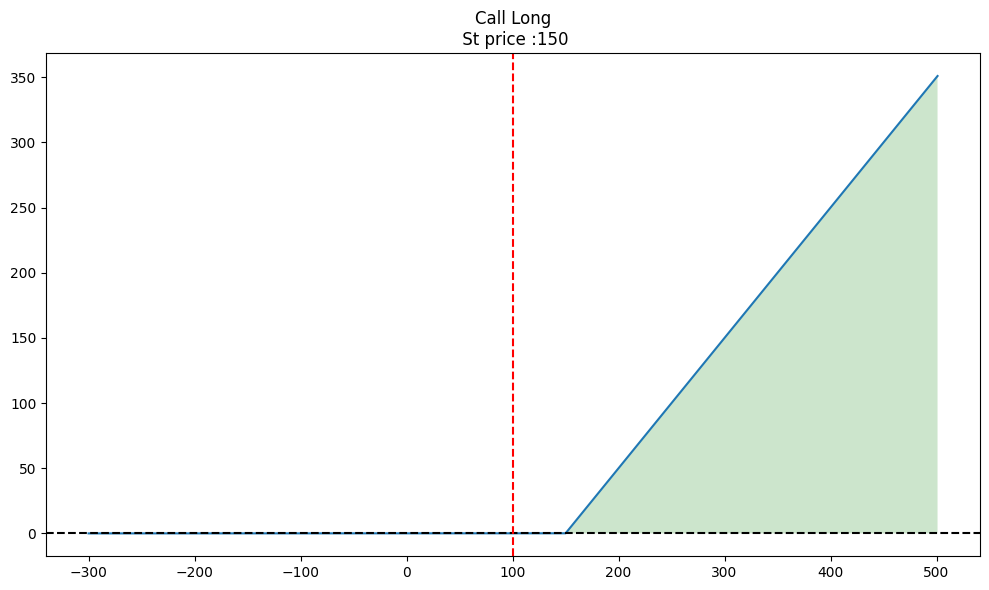

In [254]:
op.single_plotter(
    op_type = 'c',
    spot = mc.S0,
    spot_range = 400,
    strike = 150,
    tr_type='b',
    op_pr = mc.asianoption[0]
)

As we can see here that the payoff is 0 up until the underlying reaches 150, after which it steadily increases.

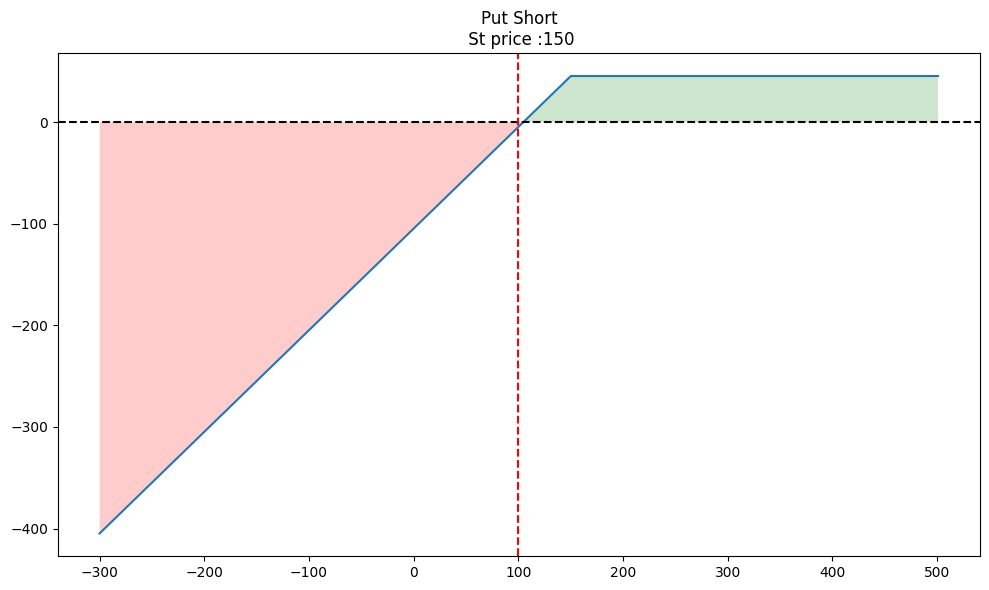

In [255]:
op.single_plotter(
    op_type = 'p',
    spot = mc.S0,
    spot_range = 400,
    strike = 150,
    tr_type='s',
    op_pr = mc.asianoption[1]
)

Here we see that the payoff is negative before above 100 and at hundred we have 0 payoff, but as the price of the underlying decreases for the put option, the payoff increases.<br>

Since the price of the stock is already at 100, the holder of this put option is almost guaranteed a positive payoff.

#### **Floating Strike**

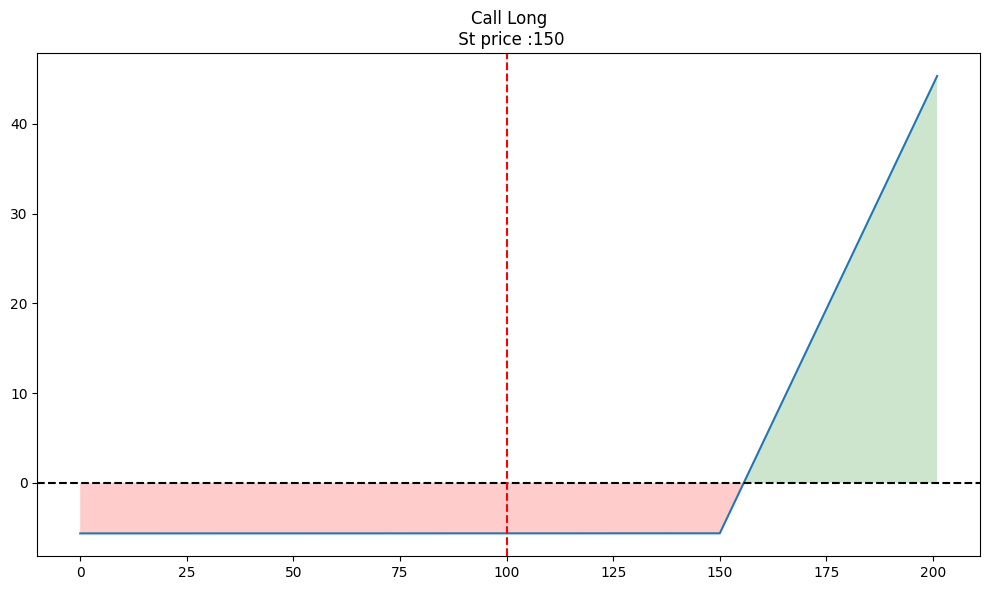

In [256]:
op.single_plotter(
    op_type = 'c',
    spot = mc.S0,
    spot_range = 100,
    strike = 150,
    tr_type='b',
    op_pr = mc.asianoption[2]
)

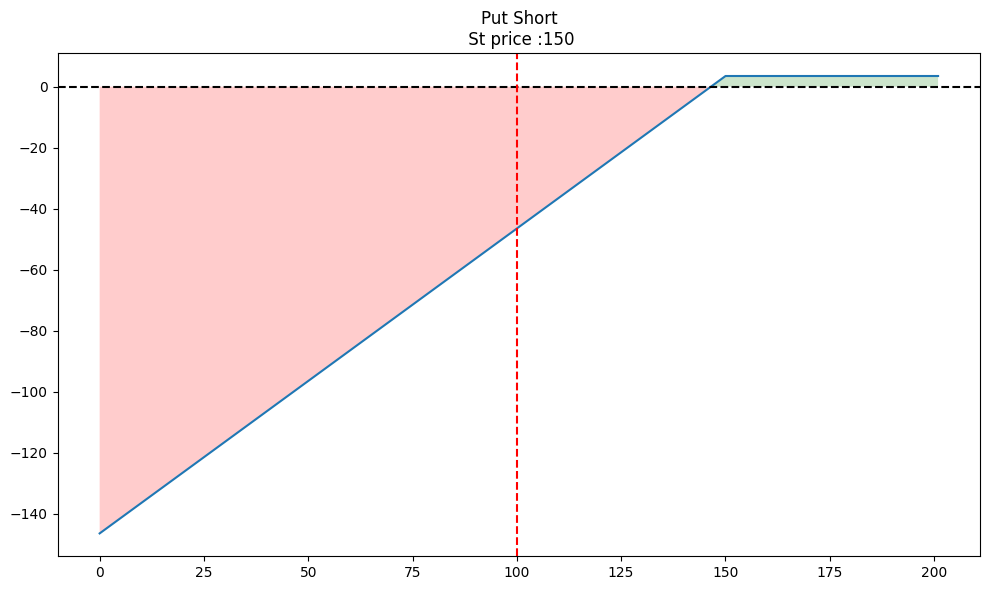

In [257]:
op.single_plotter(
    op_type = 'p',
    spot = mc.S0,
    spot_range = 100,
    strike = 150,
    tr_type='s',
    op_pr = mc.asianoption[3]
)

## Lookback Option Payoff

### **Fixed Strike**

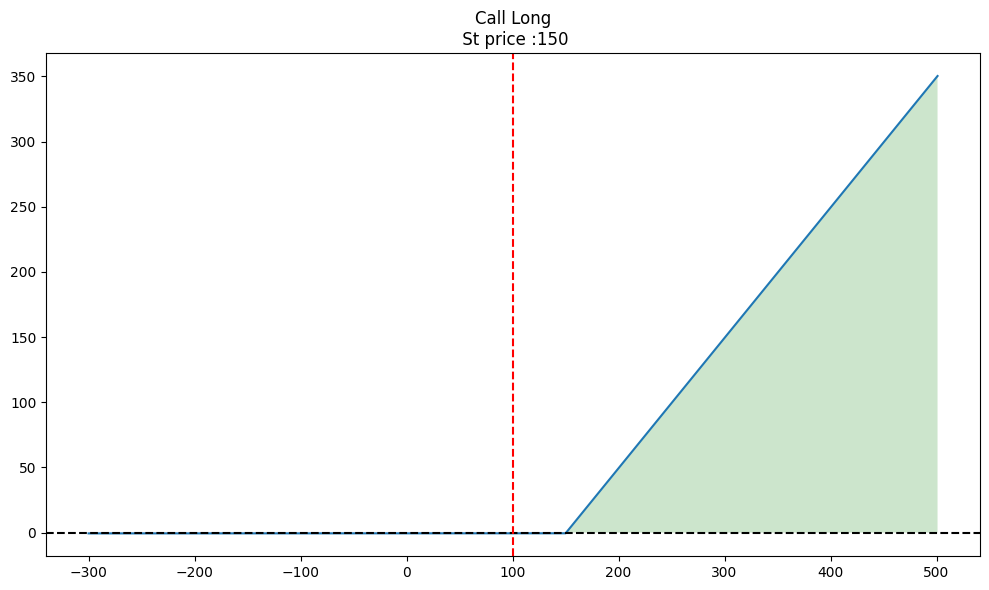

In [258]:
op.single_plotter(
    op_type = 'c',
    spot = mc.S0,
    spot_range = 400,
    strike = 150,
    tr_type='b',
    op_pr = mc.lookbackoption[0]
)

This graph behaves the same way as the Fixed Strike Asian option graph, with payoff 0 until the underlying price rises to 150 (the strike price).<br>

Similarly the put option graph below also behaves like the Fixed Strike Asian put option.

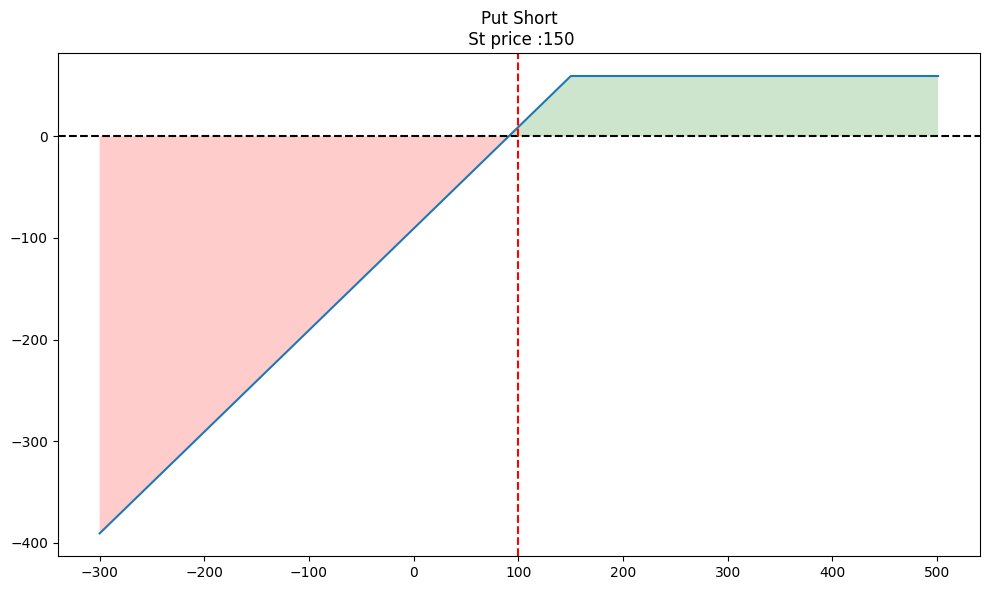

In [259]:
op.single_plotter(
    op_type = 'p',
    spot = mc.S0,
    spot_range = 400,
    strike = 150,
    tr_type='s',
    op_pr = mc.lookbackoption[1]
)

### **Floating Strike**

The Floating Strike option stays the same as Case 1, due to no change in calculation values.

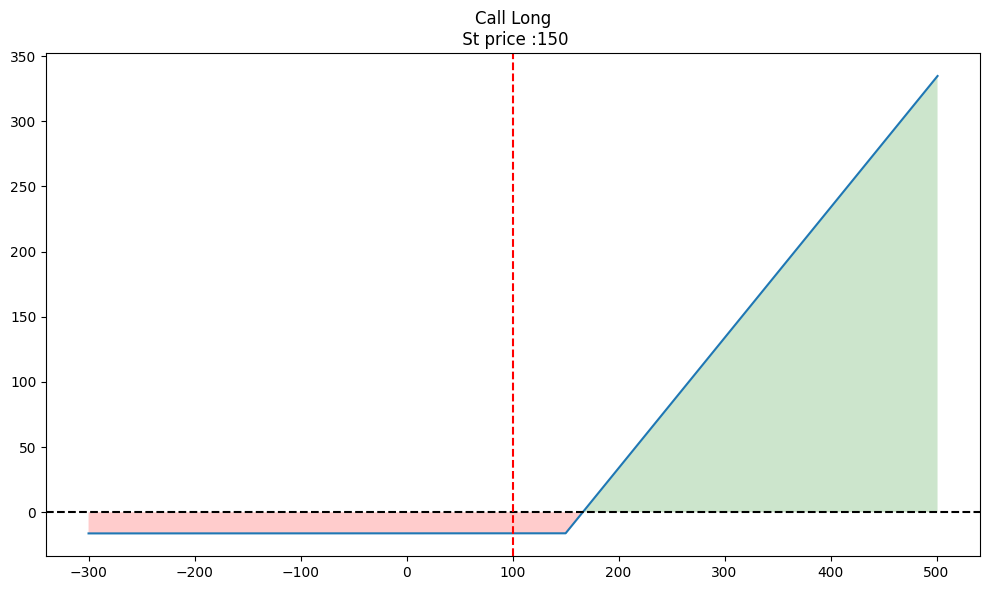

In [260]:
op.single_plotter(
    op_type = 'c',
    spot = mc.S0,
    spot_range = 400,
    strike = 150,
    tr_type='b',
    op_pr = mc.lookbackoption[2]
)

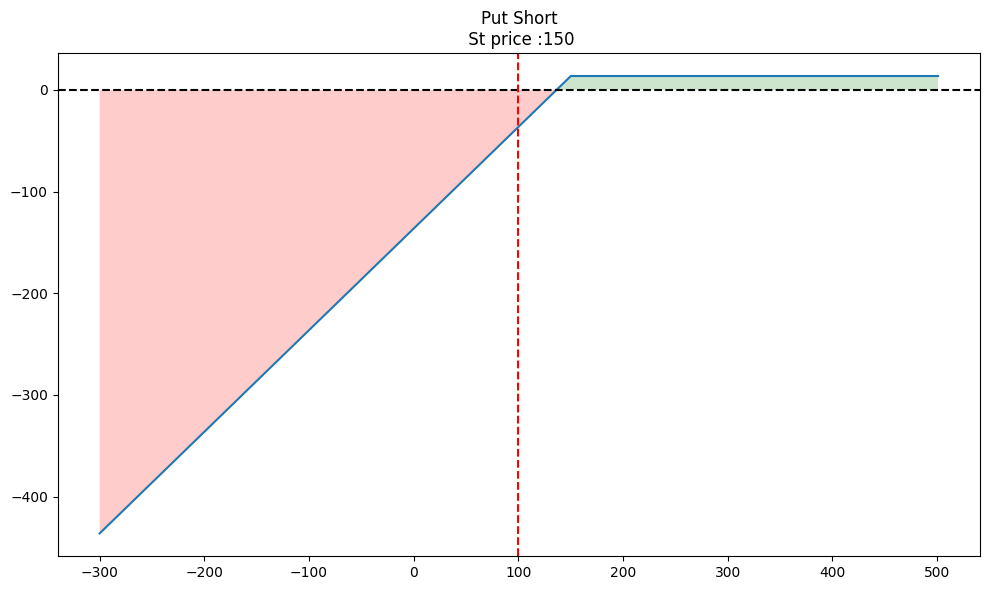

In [261]:
op.single_plotter(
    op_type = 'p',
    spot = mc.S0,
    spot_range = 400,
    strike = 150,
    tr_type='s',
    op_pr = mc.lookbackoption[3]
)

Since we increased the strike price, we got the respective results mentioned above, but what if we decreased it??<br>

A simple answer would be that the complete opposite would happen in terms of the Fixed Strike Options, with the call option being way more expensive and the put option being really cheap, because the same principals would be applied as discussed above.<br><br>

#### **Case 2**

|       **Option**       | **Case 1** | **Case 2** | **Case 3** | **Case 4** | **Case 5** |     
|------------------------|------------|------------|------------|------------|------------|
| Vanilla Call           | 10.1560    |  0.3637    |  -         |  -         |  -         |
| Vanilla Put            | 5.7143     |  43.4835   |  -         |  -         |  -         |
| Asian Fixed Call       | 5.6837     |  0.0028    |  -         |  -         |  -         |
| Asian Fixed Put        | 3.3811     |  45.2617   |  -         |  -         |  -         |
| Asian Floating Call    | 5.6441     |  5.6441    |  -         |  -         |  -         |
| Asian Floating Put     | 3.5050     |  3.5050    |  -         |  -         |  -         |
| Lookback Fixed Call    | 18.1355    |  0.6143    |  -         |  -         |  -         |
| Lookback Fixed Put     | 11.8031    |  59.3646   |  -         |  -         |  -         |
| Lookback Floating Call | 16.2448    |  16.2448   |  -         |  -         |  -         |
| Lookback Floating Put  | 13.6939    |  13.6939   |  -         |  -         |  -         |

<br><br>

<hr>

# Case 3

For Case 3, we shall try changing the maturity period with everything else being the original sample arguments and observe the changes.<br>

$S0 = 100$<br>
$E = 100$<br>
$(T-t) = 3 year$<br>
$\sigma = 20\%$<br>
$r = 5\%$

In [262]:
# Instantiating and simulating all paths
mc = MonteCarloOptionPricing(100,100,0.05,0.2,3,10000)
pd.DataFrame(mc.simulatepath).head(2)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
1,103.699501,101.668548,99.619732,99.730207,102.058513,102.591571,94.342298,97.167494,101.063301,100.282219,...,101.610109,102.974391,97.316343,99.721553,96.602072,99.790773,99.946737,98.39091,100.163932,102.568678


## Pricing the Options for Case 3

In [263]:
# Get option values
print("Using Fixed Strike :")
print(f"Asian Call Option Value is {mc.asianoption[0]:0.4f}")
print(f"Asian Put Option Value is {mc.asianoption[1]:0.4f}\n")
print("Using Floating Strike :")
print(f"Asian Call Option Value is {mc.asianoption[2]:0.4f}")
print(f"Asian Put Option Value is {mc.asianoption[3]:0.4f}")

Using Fixed Strike :
Asian Call Option Value is 10.9373
Asian Put Option Value is 4.3529

Using Floating Strike :
Asian Call Option Value is 11.2648
Asian Put Option Value is 4.6796


In [264]:
print("Using Fixed Strike :")
print(f"Lookback Call Option Value is {mc.lookbackoption[0]:0.4f}")
print(f"Lookback Put Option Value is {mc.lookbackoption[1]:0.4f}\n")
print("Using Floating Strike :")
print(f"Lookback Call Option Value is {mc.lookbackoption[2]:0.4f}")
print(f"Lookback Put Option Value is {mc.lookbackoption[3]:0.4f}\n")

Using Fixed Strike :
Lookback Call Option Value is 34.3882
Lookback Put Option Value is 16.0494

Using Floating Strike :
Lookback Call Option Value is 29.2191
Lookback Put Option Value is 21.2186



In [265]:
print(f"European Call Option Value is {mc.vanillaoption[0]:0.4f}")
print(f"European Put Option Value is {mc.vanillaoption[1]:0.4f}")

European Call Option Value is 20.3505
European Put Option Value is 7.1809


#### **Inference**

In this case, we see that the price of all the above options has risen drastically. This rise in price is attributed to the increase in Time to Expiry.<br>
Let us look into this in more detail :<br><br>

- When we increase the time to expiry, we essentially are providing the stock more time at the same volatility to probably move in the desired direction. Simply put, there is a higher chance that the stock would rise or fall a drastic amount from the strike price over the course of 3 years in comparison to just 1 year.<br>

- This means that the holder could quite possibly make unlimited profits off of the respective option and only face the loss of the premium he pays at the time of purchase, which would have a very low probability of happening.<br>
    Thus in all the above cases, the price of the options, whether it be a call or put, priced at Fixed strike or Floating Strike, will be more expensive than our sample Case 1.

## Plotting Asian Option Payoff

### **Fixed Strike**

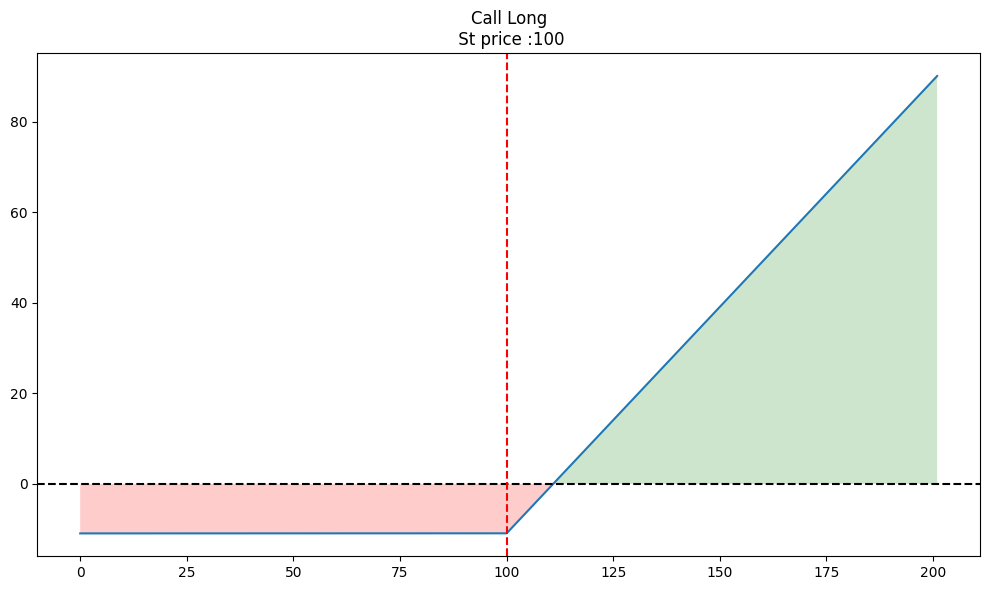

In [266]:
op.single_plotter(
    op_type = 'c',
    spot = mc.S0,
    spot_range = 100,
    strike = 100,
    tr_type='b',
    op_pr = mc.asianoption[0]
)

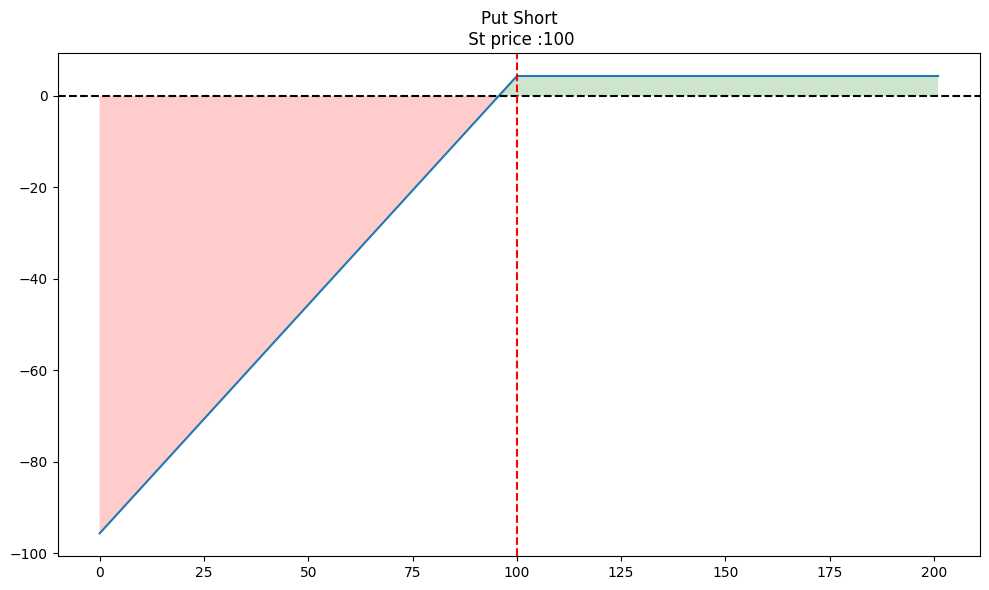

In [267]:
op.single_plotter(
    op_type = 'p',
    spot = mc.S0,
    spot_range = 100,
    strike = 100,
    tr_type='s',
    op_pr = mc.asianoption[1]
)

## Plotting Lookback Option Payoff

### **Fixed Strike**

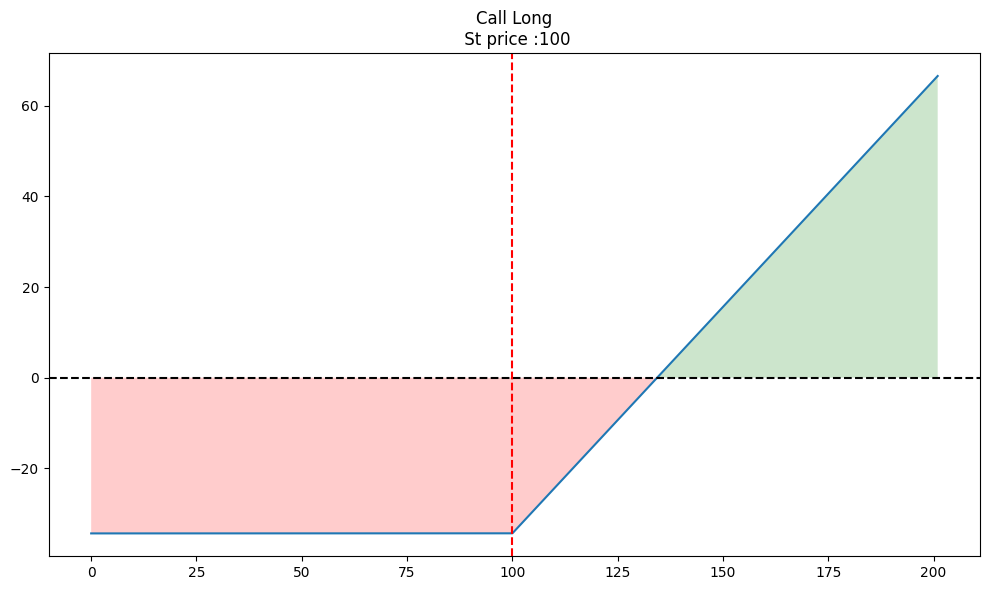

In [268]:
op.single_plotter(
    op_type = 'c',
    spot = mc.S0,
    spot_range = 100,
    strike = 100,
    tr_type='b',
    op_pr = mc.lookbackoption[0]
)

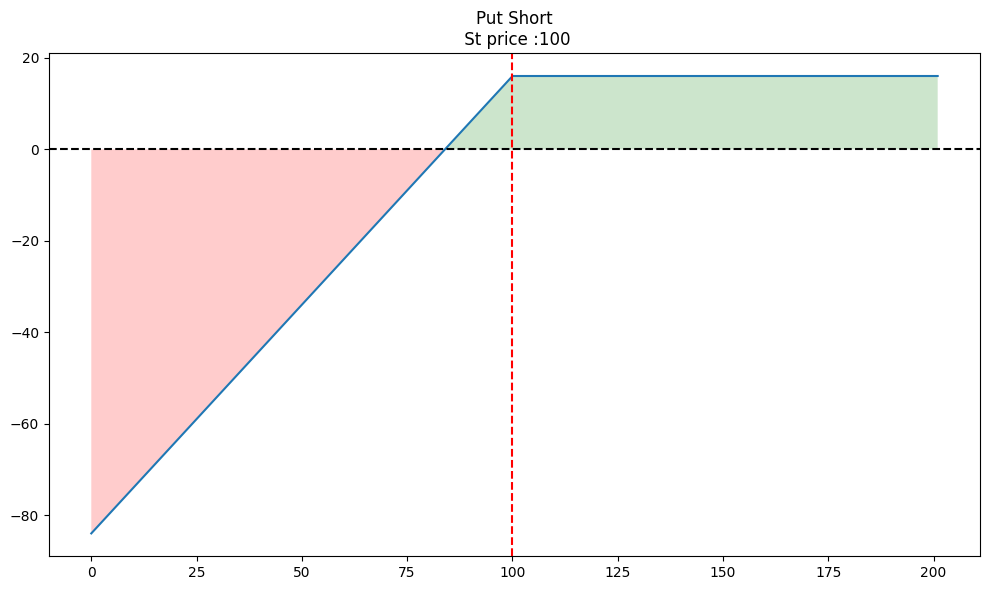

In [269]:
op.single_plotter(
    op_type = 'p',
    spot = mc.S0,
    spot_range = 100,
    strike = 100,
    tr_type='s',
    op_pr = mc.lookbackoption[1]
)

The above graphs show the payoff for the Asian option and Lookback options respectively. We have only taken the fixed strike as in this case, all the graphs look and behave the same way, with the only difference being that the premium is high.

Just for confirmation purposes, let us also decrease the time to expiry of the options and run the simulation again.<br><br>

**Hypothesis :**<br>

**The option prices will decrease as the scope for the underlying stock price to reach a high value is curbed due to the reduction in time to expiry, at constant volatility. $[(T-t) = 6 months]$**

In [270]:
# Instantiating and simulating all paths
mc = MonteCarloOptionPricing(100,100,0.05,0.2,0.5,10000)
pd.DataFrame(mc.simulatepath).head(2)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,101.495935,100.666802,99.830377,99.875478,100.826004,101.043624,97.675873,98.829254,100.419711,100.100835,...,100.642945,101.19991,98.890022,99.871945,98.598422,99.900204,99.963875,99.328712,100.052545,101.034279


In [271]:
# Get option values
print("Using Fixed Strike :")
print(f"Asian Call Option Value is {mc.asianoption[0]:0.4f}")
print(f"Asian Put Option Value is {mc.asianoption[1]:0.4f}\n")
print("Using Floating Strike :")
print(f"Asian Call Option Value is {mc.asianoption[2]:0.4f}")
print(f"Asian Put Option Value is {mc.asianoption[3]:0.4f}")

Using Fixed Strike :
Asian Call Option Value is 3.8013
Asian Put Option Value is 2.6526

Using Floating Strike :
Asian Call Option Value is 3.7384
Asian Put Option Value is 2.7245


In [272]:
print("Using Fixed Strike :")
print(f"Lookback Call Option Value is {mc.lookbackoption[0]:0.4f}")
print(f"Lookback Put Option Value is {mc.lookbackoption[1]:0.4f}\n")
print("Using Floating Strike :")
print(f"Lookback Call Option Value is {mc.lookbackoption[2]:0.4f}")
print(f"Lookback Put Option Value is {mc.lookbackoption[3]:0.4f}\n")

Using Fixed Strike :
Lookback Call Option Value is 12.2412
Lookback Put Option Value is 9.0853

Using Floating Strike :
Lookback Call Option Value is 11.2479
Lookback Put Option Value is 10.0786



In [273]:
print(f"European Call Option Value is {mc.vanillaoption[0]:0.4f}")
print(f"European Put Option Value is {mc.vanillaoption[1]:0.4f}")

European Call Option Value is 6.6915
European Put Option Value is 4.5289


Looks like our hypothesis is true. The prices of the options have fallen even in comparison to Case 1. This shows that in the context of Case 3, the vice versa is also applicable for the options with regards to increasing the time to expiry.
<br><br>


#### **Case 3**

|       **Option**       | **Case 1** | **Case 2** | **Case 3** | **Case 4** | **Case 5** |     
|------------------------|------------|------------|------------|------------|------------|
| Vanilla Call           | 10.1560    |  0.3637    |  20.3505   |  -         |  -         |
| Vanilla Put            | 5.7143     |  43.4835   |  7.1809    |  -         |  -         |
| Asian Fixed Call       | 5.6837     |  0.0028    |  10.9373   |  -         |  -         |
| Asian Fixed Put        | 3.3811     |  45.2617   |  4.3529    |  -         |  -         |
| Asian Floating Call    | 5.6441     |  5.6441    |  11.2648   |  -         |  -         |
| Asian Floating Put     | 3.5050     |  3.5050    |  4.6796    |  -         |  -         |
| Lookback Fixed Call    | 18.1355    |  0.6143    |  34.3882   |  -         |  -         |
| Lookback Fixed Put     | 11.8031    |  59.3646   |  16.0494   |  -         |  -         |
| Lookback Floating Call | 16.2448    |  16.2448   |  29.2191   |  -         |  -         |
| Lookback Floating Put  | 13.6939    |  13.6939   |  21.2186   |  -         |  -         |

<br><br>

<hr>

# Case 4

Now let us try changing the volatility to see the changes that will occur in the valuation of the options.

$S0 = 100$<br>
$E = 100$<br>
$(T-t) = 1 year$<br>
$\sigma = 35\% $<br>
$r = 5\% $

In [274]:
# Instantiating and simulating all paths
mc = MonteCarloOptionPricing(100,100,0.05,0.35,1,10000)
df = pd.DataFrame(mc.simulatepath)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
1,103.69754,101.64554,99.575492,99.687112,102.039546,102.578128,94.243368,97.097841,101.034021,100.244844,...,101.586496,102.964915,97.248233,99.678368,96.52656,99.748305,99.905885,98.333936,100.125332,102.554998


## Pricing The Options

In [275]:
# Get option values
print("Using Fixed Strike :")
print(f"Asian Call Option Value is {mc.asianoption[0]:0.4f}")
print(f"Asian Put Option Value is {mc.asianoption[1]:0.4f}\n")
print("Using Floating Strike :")
print(f"Asian Call Option Value is {mc.asianoption[2]:0.4f}")
print(f"Asian Put Option Value is {mc.asianoption[3]:0.4f}")

Using Fixed Strike :
Asian Call Option Value is 8.9165
Asian Put Option Value is 6.6876

Using Floating Strike :
Asian Call Option Value is 8.8550
Asian Put Option Value is 6.9299


In [276]:
print("Using Fixed Strike :")
print(f"Lookback Call Option Value is {mc.lookbackoption[0]:0.4f}")
print(f"Lookback Put Option Value is {mc.lookbackoption[1]:0.4f}\n")
print("Using Floating Strike :")
print(f"Lookback Call Option Value is {mc.lookbackoption[2]:0.4f}")
print(f"Lookback Put Option Value is {mc.lookbackoption[3]:0.4f}\n")

Using Fixed Strike :
Lookback Call Option Value is 30.9462
Lookback Put Option Value is 21.2546

Using Floating Strike :
Lookback Call Option Value is 25.4087
Lookback Put Option Value is 26.7921



In [277]:
print(f"European Call Option Value is {mc.vanillaoption[0]:0.4f}")
print(f"European Put Option Value is {mc.vanillaoption[1]:0.4f}")

European Call Option Value is 15.6577
European Put Option Value is 11.5037


#### **Inference**

*"Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security."* <br> - Investopedia
<br><br>

This above statement tells us that when the volatility of an underlying stock is high, it is more likely to increase drastically in value or decrease drastically in a short period of time. This not only increases the chances of greater rewards, but also the chances of great losses.<br>

But in the case of options, our losses are limited to the premium paid during the purchase of the option and the profits are unlimited. Thus keeping that in mind, when the underlying has a high volatility in the market, it is more probable for the holder of the option to gain a profit, whether it be by a call or a put option.<br>

The put option is still cheaper as the price of the underlying cannot fall below 0, thus payoff is only unlimited until the prcie of underlying reaches 0.<br>

Therefore, the price of the above options increase in value as compared to that in Case 1, which hadd comparatively lower volatility.<br><br><br>

Below we have taken 2 random simulated paths from the 10000 paths that we created using the Monte Carlo and Euler Maruyama methods.<br>

We see that in the 1st one, the stock price goes up to almost 165 due to its high volatility, which implies that if the holder of the option were to exercise their Call option at that time step, they would recieve a payoff of : $160 - V(S,t)$ which is a high payoff since the strike price was 100.<br><br>

Same with graph 2, which represents what would occur with a Put option. The price of the underlying fell to almost 65, which is 35 less than the strike price so the payoff for the Put option exercised at that time step would be : $65 - V(S,t)$

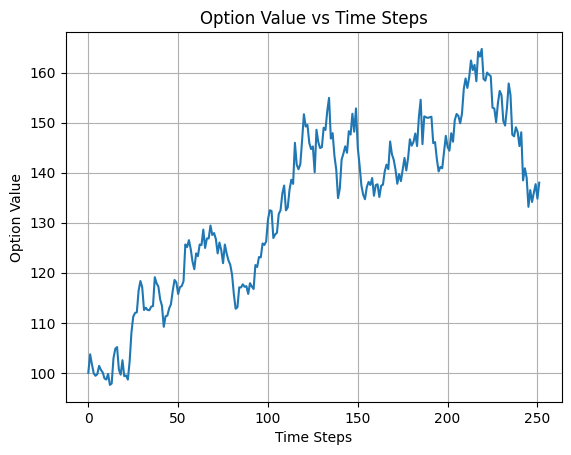

In [278]:
plt.plot(df[0])
plt.xlabel('Time Steps')
plt.ylabel('Option Value')
plt.title('Option Value vs Time Steps')
plt.grid(True)
plt.show()

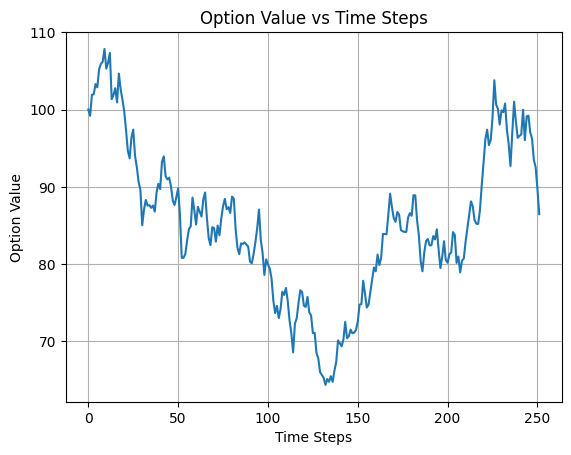

In [279]:
plt.plot(df[50])
plt.xlabel('Time Steps')
plt.ylabel('Option Value')
plt.title('Option Value vs Time Steps')
plt.grid(True)
plt.show()

## Plotting Asian Option Payoff 

### **Fixed Strike**

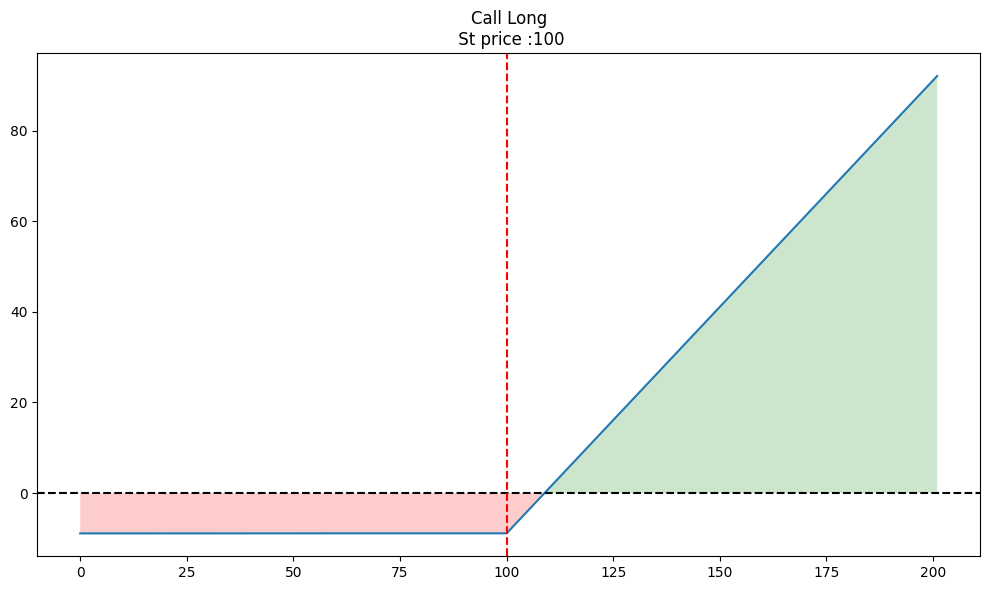

In [280]:
op.single_plotter(
    op_type = 'c',
    spot = mc.S0,
    spot_range = 100,
    strike = 100,
    tr_type='b',
    op_pr = mc.asianoption[0]
)

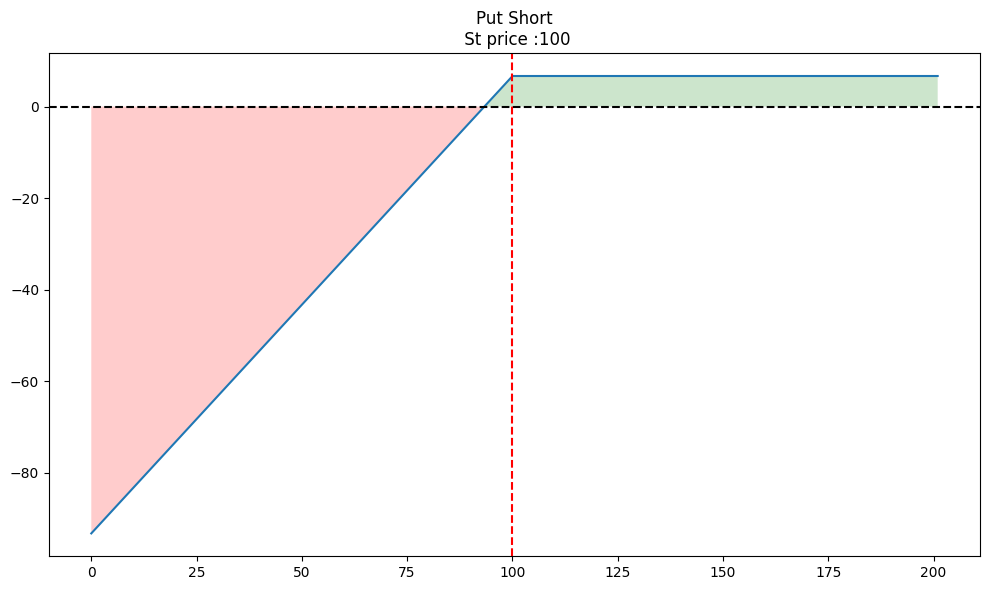

In [281]:
op.single_plotter(
    op_type = 'p',
    spot = mc.S0,
    spot_range = 100,
    strike = 100,
    tr_type='s',
    op_pr = mc.asianoption[1]
)

## Plotting Lookback Option Payoff

### **Fixed Strike**

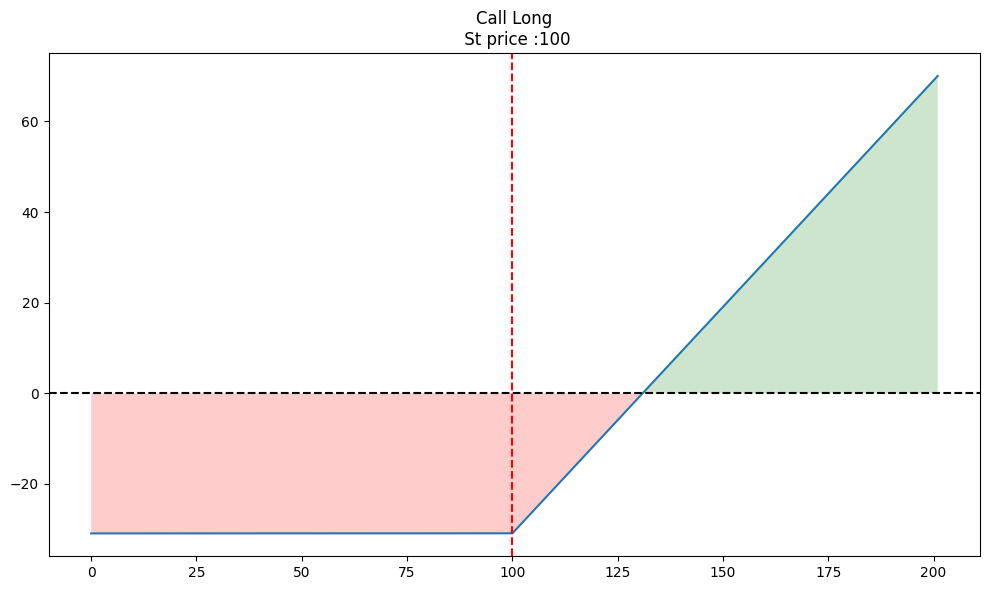

In [282]:
op.single_plotter(
    op_type = 'c',
    spot = mc.S0,
    spot_range = 100,
    strike = 100,
    tr_type='b',
    op_pr = mc.lookbackoption[0]
)

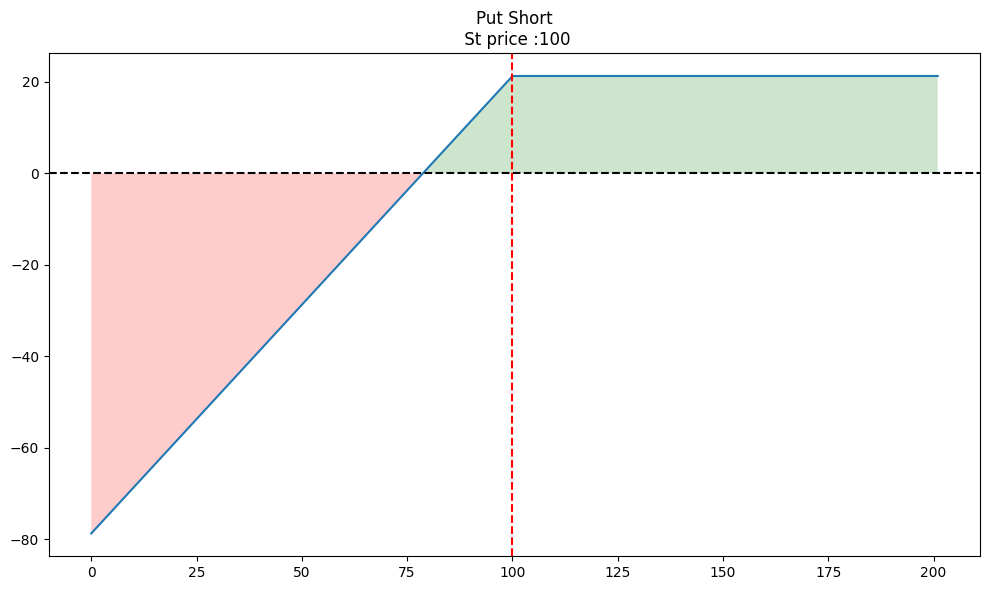

In [283]:
op.single_plotter(
    op_type = 'p',
    spot = mc.S0,
    spot_range = 100,
    strike = 100,
    tr_type='s',
    op_pr = mc.lookbackoption[1]
)

We saw that when the volatility is high, the risk to reward ratio is also high, and in case of options, the payoffs and in turn the profits on exercising are more probable to be huge.<br>

The opposite is true for when the underlying stock has low volatility. This is because, the dispersion of the stock price will be low which will lead to shorter fluctuations in price and even though the risk will be reduced, so will the returns.<br>

Therefore the price of options having underlying stocks with low volatility will be lower as compared to those with high volatility.<br><br>



#### **Case 4**

|       **Option**       | **Case 1** | **Case 2** | **Case 3** | **Case 4** | **Case 5** |     
|------------------------|------------|------------|------------|------------|------------|
| Vanilla Call           | 10.1560    |  0.3637    |  20.3505   |  15.6577   |  -         |
| Vanilla Put            | 5.7143     |  43.4835   |  7.1809    |  11.5037   |  -         |
| Asian Fixed Call       | 5.6837     |  0.0028    |  10.9373   |  8.9165    |  -         |
| Asian Fixed Put        | 3.3811     |  45.2617   |  4.3529    |  6.6876    |  -         |
| Asian Floating Call    | 5.6441     |  5.6441    |  11.2648   |  8.8550    |  -         |
| Asian Floating Put     | 3.5050     |  3.5050    |  4.6796    |  6.9299    |  -         |
| Lookback Fixed Call    | 18.1355    |  0.6143    |  34.3882   |  30.9462   |  -         |
| Lookback Fixed Put     | 11.8031    |  59.3646   |  16.0494   |  21.2546   |  -         |
| Lookback Floating Call | 16.2448    |  16.2448   |  29.2191   |  25.4087   |  -         |
| Lookback Floating Put  | 13.6939    |  13.6939   |  21.2186   |  26.7921   |  -         |

<br><br>

<hr>

# Case 5

This will be our final case and we will observe the change that will occur if we increase the Risk Free Rate of Interest.

$S0 = 100$<br>
$E = 100$<br>
$(T-t) = 1 year$<br>
$\sigma = 20\% $<br>
$r = 15\% $

In [284]:
# Instantiating and simulating all paths
mc = MonteCarloOptionPricing(100,100,0.15,0.2,1,10000)
df = pd.DataFrame(mc.simulatepath)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
1,102.161066,100.988495,99.80561,99.869393,101.213641,101.521402,96.758682,98.38981,100.639055,100.188097,...,100.954755,101.742423,98.475748,99.864396,98.063363,99.90436,99.994406,99.096149,100.119804,101.508185


## Pricing The Options

In [285]:
# Get option values
print("Using Fixed Strike :")
print(f"Asian Call Option Value is {mc.asianoption[0]:0.4f}")
print(f"Asian Put Option Value is {mc.asianoption[1]:0.4f}\n")
print("Using Floating Strike :")
print(f"Asian Call Option Value is {mc.asianoption[2]:0.4f}")
print(f"Asian Put Option Value is {mc.asianoption[3]:0.4f}")

Using Fixed Strike :
Asian Call Option Value is 8.3007
Asian Put Option Value is 1.6448

Using Floating Strike :
Asian Call Option Value is 8.5539
Asian Put Option Value is 1.7592


In [286]:
print("Using Fixed Strike :")
print(f"Lookback Call Option Value is {mc.lookbackoption[0]:0.4f}")
print(f"Lookback Put Option Value is {mc.lookbackoption[1]:0.4f}\n")
print("Using Floating Strike :")
print(f"Lookback Call Option Value is {mc.lookbackoption[2]:0.4f}")
print(f"Lookback Put Option Value is {mc.lookbackoption[3]:0.4f}\n")

Using Fixed Strike :
Lookback Call Option Value is 23.0086
Lookback Put Option Value is 7.7662

Using Floating Strike :
Lookback Call Option Value is 21.2168
Lookback Put Option Value is 9.5581



In [287]:
print(f"European Call Option Value is {mc.vanillaoption[0]:0.4f}")
print(f"European Put Option Value is {mc.vanillaoption[1]:0.4f}")

European Call Option Value is 15.9495
European Put Option Value is 2.4989


### **Inference**

*The risk-free rate of return is the interest rate an investor can expect to earn on an investment that carries zero risk.*

The above tells us that in a market setting where no risk is involved whatsoever, the risk free rate is the rate of returns that an investor would recieve on their investment. We can also say that it is the minimum returns a stock trader will recieve in a risk free market.<br>

That being said, if we increase the risk free rate, it is only logical to conclude that the price of an option would increase as the minimum returns the holder of the option would be earning would increase, apart from the potentially unlimited payoff they could have from the exercise of their option. <br>

Moreover, since we discount the expected payoff of an option with the discount factor $e^{-r*(T-t)}$, where $r$ is the risk free rate, an increase in $r$ is bound to increase the valuation of the option.
<br><br>

Apart from that, we see that the given options still retain their original properties in comparison to one another.<br>
That is, the Asian Option is approximately half the price of the Vanilla Option and the Lookback Option is always more expensive than the European Option.

## Plotting Asian Option Payoff 

### **Fixed Strike**

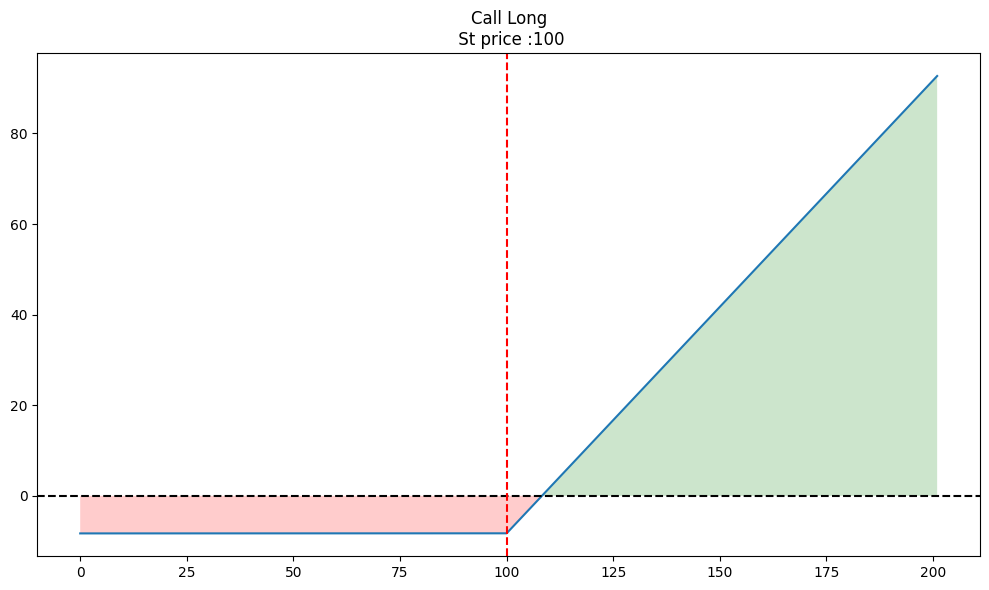

In [288]:
op.single_plotter(
    op_type = 'c',
    spot = mc.S0,
    spot_range = 100,
    strike = 100,
    tr_type='b',
    op_pr = mc.asianoption[0]
)

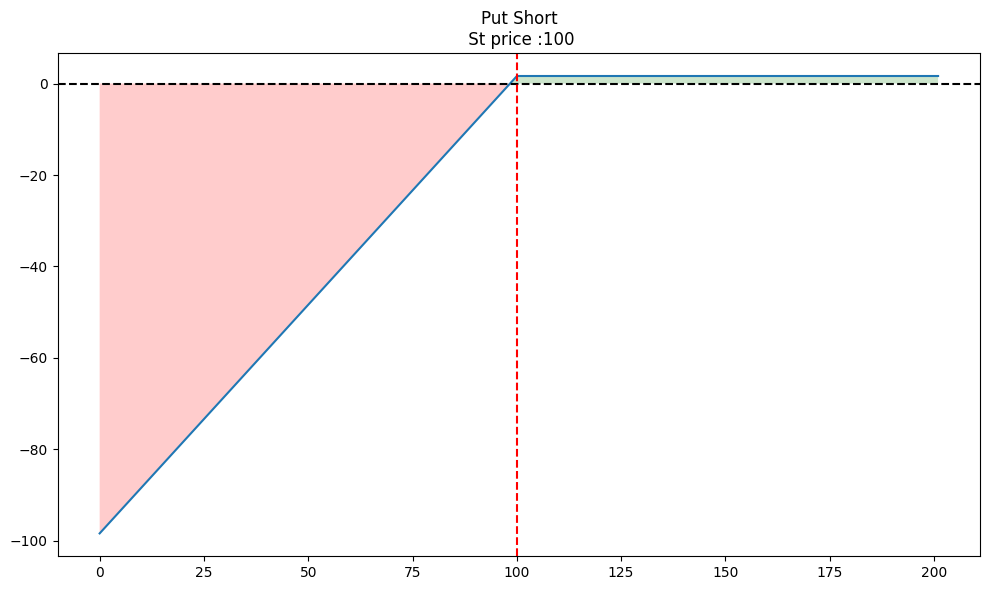

In [289]:
op.single_plotter(
    op_type = 'p',
    spot = mc.S0,
    spot_range = 100,
    strike = 100,
    tr_type='s',
    op_pr = mc.asianoption[1]
)

## Plotting Lookback Option Payoff

### **Fixed Strike**

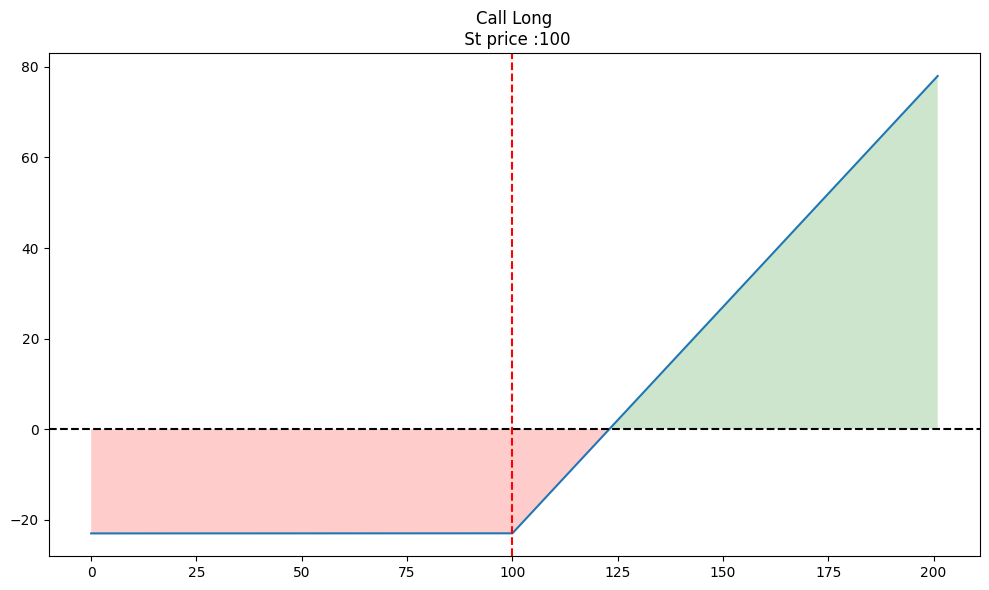

In [290]:
op.single_plotter(
    op_type = 'c',
    spot = mc.S0,
    spot_range = 100,
    strike = 100,
    tr_type='b',
    op_pr = mc.lookbackoption[0]
)

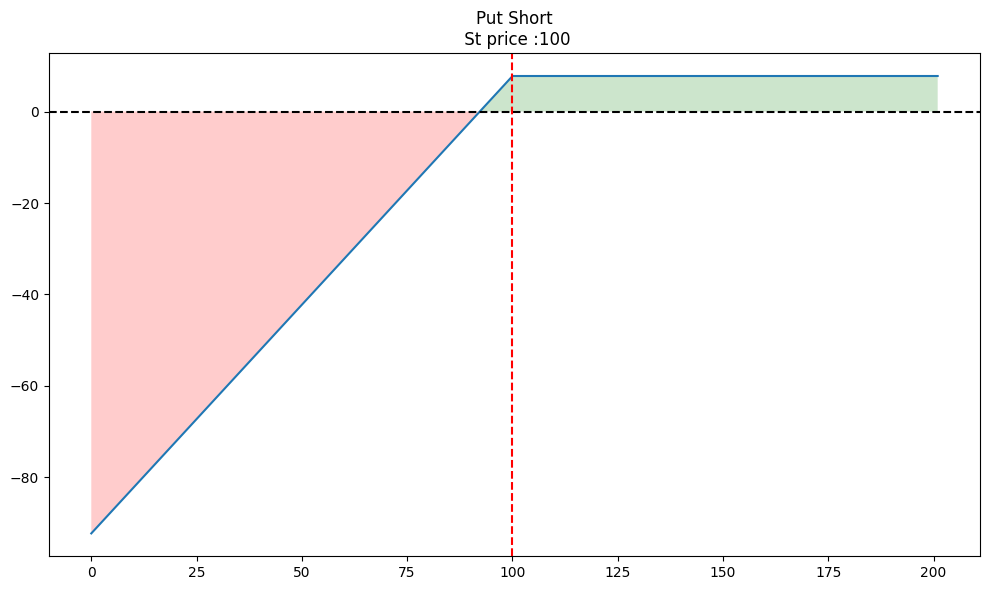

In [291]:
op.single_plotter(
    op_type = 'p',
    spot = mc.S0,
    spot_range = 100,
    strike = 100,
    tr_type='s',
    op_pr = mc.lookbackoption[1]
)

In the same way, when the risk free rate decreases, the price of options also decrease as now the minimum returns in a risk free market is decreasing so the prospects for a high profit are also less. Thus valuating options at a lower cost.

#### **Case 5**

|       **Option**       | **Case 1** | **Case 2** | **Case 3** | **Case 4** | **Case 5** |     
|------------------------|------------|------------|------------|------------|------------|
| Vanilla Call           | 10.1560    |  0.3637    |  20.3505   |  15.6577   |  15.9495   |
| Vanilla Put            | 5.7143     |  43.4835   |  7.1809    |  11.5037   |  2.4989    |
| Asian Fixed Call       | 5.6837     |  0.0028    |  10.9373   |  8.9165    |  8.3007    |
| Asian Fixed Put        | 3.3811     |  45.2617   |  4.3529    |  6.6876    |  1.6448    |
| Asian Floating Call    | 5.6441     |  5.6441    |  11.2648   |  8.8550    |  8.5539    |
| Asian Floating Put     | 3.5050     |  3.5050    |  4.6796    |  6.9299    |  1.7592    |
| Lookback Fixed Call    | 18.1355    |  0.6143    |  34.3882   |  30.9462   |  23.0086   |
| Lookback Fixed Put     | 11.8031    |  59.3646   |  16.0494   |  21.2546   |  7.7662    |
| Lookback Floating Call | 16.2448    |  16.2448   |  29.2191   |  25.4087   |  21.2168   |
| Lookback Floating Put  | 13.6939    |  13.6939   |  21.2186   |  26.7921   |  9.5581    |

<br><br>

<hr>

# Observation

Let's list all the observations that we have seen throughout this task : <br>

- In **Case 1**, we observe the relationship between Asian Options, Lookback Options and Vanilla Options:<br>
    - For a fixed set of parameters, Asian Options valuate at almost half the price of Vanilla Options because in Asian Options we consider the average price over a certain period of time.<br><br>
    - For a fixed set of parameters, Lookback Options valuate higher than Vanilla Options as Lookback Options can be exercised at the maximum price reached by the underlying throughout the life of the said option.<br>

- In **Case 2**, we observe the effect the change in Strike Price has while calculating the price of an option:<br>
    - For Fixed Strike Options, and increase in Strike Price drastically decreases the cost of Call Options but increase the price of Put options. This change occurs as when the strike price is alot higher than the current price of the underlying, there is alot of risk for the holder as to whether the underlying will even reach the strike price at time of maturity.<br>
        Whereas for Put options, since the current price of the underlying is already lower than the strike price, a positive payoff is already guaranteed. This increases the price of the Put option.<br><br>
    - For Floating Strike options on the other hand, since the Strike Price is decided at maturity, the given strike price does not affect the cost of the Call or Put option. Therefore, the value of these options in this Case are the same as that in Case 1<br>

- In **Case 3**, we observe the effect that a change in Time to Expiry has on the price of the option:<br>
    - For a fixed set of parameters, an increase in the Time of Expiry increases the price of all said options, be it Call or Put, calculated using Fixed Strike or Floating Strike. This occurs because when the time of maturity is extended, there is more time for the underlying stock price to move and the probability of it giving a higher positive payoff also increases, at fixed volatility.<br><br>
    - For a fixed set of parameters, decreasing the TIme of Expiry in turn decreases the price of the option. This is because the underlying stock gets lesser time to fluctuate and so the probability of a higher payoff is decreased, at fixed volatility.<br>

- In **Case 4**, we observe the effect of changing the volatility of the underlying stock and the value of the option: <br>
    - For a fixed set of parameters, an increase in volatility increases the price of the option. This happens because with higher volatility, the price dispersion increases. Although this increases the risk, it also increases the rewards. In other words, higher volatility increases the probability of getting a higher payoff. Thus the price of the option is higher.
    - For a fixed set of parameters, a decrease in volatility will decrease the price of the option because the dispersion in the price of the underlying decreases, in turn the payoff is not as high. Thus the price of the option decreases.<br>

- In **Case 5**, we observe the effect of changing the risk free interest rate on the value of the option: <br>
    - For a fixed set of parameters, an increase in the risk free rate leads to a higher price for the given option. Since the risk free rate is the rate of returns an investor gets from his investments in a risk free market, that is at 0 risk, the increase of this rate means an increase in the minimum returns from the given option. This in turn means that the value of the stock will be high.<br>
    - For a fixed set of parameters, a decrease in the risk free rate leads to a lower price of the given option because this decrease lowers the minimum returns recieved by the investor. Thus the premium paid will be lower for these options.<br><br>
<hr>

# Conclusion

To conclude, every single parameter used to price options influences the value of an option.<br>
Thus every slight change in either of the parameters changes the value of that option. Fixed and Floating Strike is only influenced differently by the change in Strike price.<br>
All the above cases that we looked at prove the relationship between all these given parameters and the value of the option in detail thus completing the task at hand.<br><br>

Thank you!